# Homework 3
Complete the exercises working in your group. You may share the notebook with your group members using the share button in the upper right. 







In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [ ]:
!pip install tables

# uncomment the line above if tables is not installed

     |████████████████████████████████| 4.3 MB 15.3 MB/s 
     |████████████████████████████████| 471 kB 61.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Question 1
## Plotting practice
These questions follow the examples presented in Notebook 9 from the Textbook. See that notebook for the dataset and template code.
*  Generate a violin plot that shows the distribution of height in each income group. Can you see a relationship between these variables?
* Make a boxplot that shows the distribution of weight in each income group. Plot the y-axis on a logarithmic scale.
* Generate a visualization of the relationship between weight and vegetable consumption. 

In [ ]:
if not os.path.exists('brfss.hdf5'):
    !wget https://github.com/AllenDowney/ElementsOfDataScience/raw/master/brfss.hdf5

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

# brief display of the table
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.shape
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [ ]:
# display of the data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])
data.shape

(81335, 9)

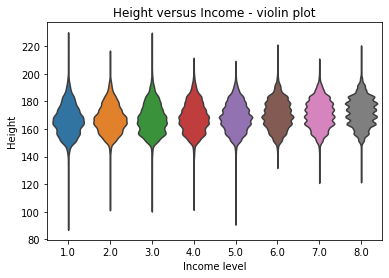

In [ ]:
# violinplot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

plt.xlabel('Income level')
plt.ylabel('Height')
plt.title('Height versus Income - violin plot');

According to the violin plot above, we can see that the heights are approximately the same for different income group, which seem to be around ``168``.

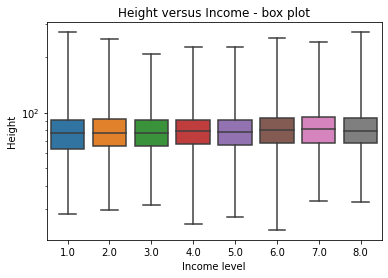

In [ ]:
sns.boxplot(x='INCOME2', y='WTKG3', data=data, whis=10)

plt.xlabel('Income level')
plt.ylabel('Height')
plt.title('Height versus Income - box plot')
plt.yscale('log')

The box plot above proves our observation for the previous graph that heights are approximately the same for different groups.

In [ ]:
weight = brfss['WTKG3']
vegetableConsumption = brfss['_VEGESU1']

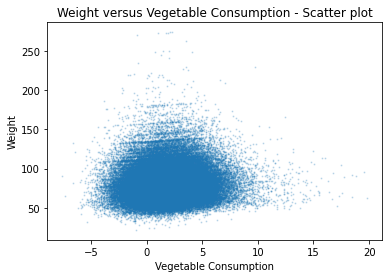

In [ ]:
noise = np.random.normal(0, 2, size = len(brfss))
vegetableConsumption_jitter = vegetableConsumption + noise
weight_jitter = weight + noise

plt.plot(vegetableConsumption_jitter, weight_jitter, 'o', alpha = 0.2, markersize = 1)

plt.xlabel('Vegetable Consumption')
plt.ylabel('Weight')
plt.title('Weight versus Vegetable Consumption - Scatter plot');

# Question 2
## Correlation
Recall that correlation only measures linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is.

To demonstrate, generate another example of fake data that is different from the data presented in the text which was $y=x^2$. Explain what is the association between the variables (e.g. $y=x^4$, $y=sin(x)$) and why the correlation is low or zero despite there being a clear relationship between the variables.

We generate random data `x`s in the range of (-1, 1) by using **np.random**. `y`s are calculated by adding some noise to `4*x`.

In [ ]:
np.random.seed(350)
x = np.linspace(-1, 1)
y = x**4 + np.random.normal(0, 0.01, len(x))

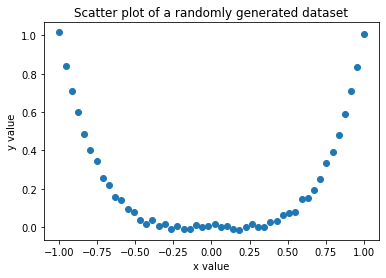

In [ ]:
plt.plot(x, y, 'o')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Scatter plot of a randomly generated dataset');

In [ ]:
np.corrcoef(x, y)

array([[ 1.        , -0.00746804],
       [-0.00746804,  1.        ]])

From the graph above, we can see that there is a strong non-linear relationship. Although visually that is obvious, the computed correlation is only `-0.007`. In general, a low correlation level does not mean there is no non-linear relationship. This is because correlation only measures linear relationships.

# Question 3
## Simple regression
Who do you think eats more vegetables, people with low income, or people with high income? To answer this question, make a scatter plot with vegetable servings versus income, then estimate the slope of the relationship between vegetable consumption and income.

What is the slope of the regression line? Write a sentence that explains what this slope means in the context of the question we are exploring.

Finally, plot the regression line on top of the scatter plot.

In [ ]:
data_3 = brfss.dropna(subset = ['INCOME2', '_VEGESU1'])
income = data_3['INCOME2']
vege_consump = data_3['_VEGESU1']

In [ ]:
# estimate the slope
res = linregress(income, vege_consump)
res

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864099, pvalue=1.378503916248713e-238, stderr=0.002110976356332333, intercept_stderr=0.013196467544093607)

The slope is around 0.07 which means that there is a slightly positive relationship between vegetable intake and income. People have higher income are slightly more likely to eat more vegetable.

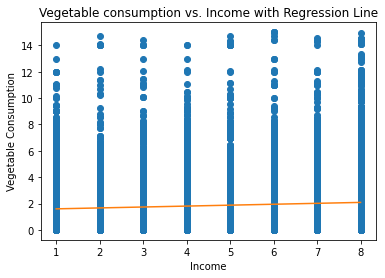

In [ ]:
# plot the graph with slope
plt.plot(income, vege_consump, 'o')

fx = np.array([income.min(), income.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.xlabel('Income')
plt.ylabel('Vegetable Consumption')
plt.title('Vegetable consumption vs. Income with Regression Line');

# Question 4

## Inference
Complete the exercise from Notebook 11 which asks:
> But suppose we would like to know whether first babies are more unpredictable than other babies. In that case the test statistic we choose might be the standard deviation of pregnancy length, which is one way to quantify unpredictability.

1. Write a version of `test_stat` that computes the difference in standard deviation between the groups.

2. Write a loop that estimates the distribution of this test statistic under the null hypothesis.

3. Compute a p-value.

In [ ]:
if not os.path.exists('nsfg.hdf5'):
    !wget https://github.com/AllenDowney/ElementsOfDataScience/raw/master/nsfg.hdf5

nsfg = pd.read_hdf('nsfg.hdf5')
first = (nsfg.birthord == 1)
others = (nsfg.birthord > 1)
prglngth = nsfg['prglngth']

We write a function called `test_stat` to compute the difference in standard deviations between the groups:

In [ ]:
def test_stat(group1, group2):
  d = np.std(group1) - np.std(group2)
  return d

Calculate the difference by using `test_stat`.

In [ ]:
group1 = prglngth[first]
group2 = prglngth[others]
diff = test_stat(group1, group2)
diff

0.1712158666885042

Under null hypothesis, we believe that there is no difference between the standard deviation for `prglngth`(predictability of pregnancy length) of first baby and that of others. Therefore, we regroup them and **shuffle**, then **split** the data to make two simulated groups same size as what we have at the origin. Then we use **test_stat** for the simulated data by running the simulation many times and store the results.

In [ ]:
pool = np.concatenate([group1, group2])
# shuffle
np.random.shuffle(pool)
# split
sim_group1, sim_group2 = np.split(pool, [len(group1)])

In [ ]:
diffs = np.empty(1000)

for i in range(len(diffs)):
  np.random.shuffle(pool)
  sim_group1, sim_group2 = np.split(pool, [len(group1)])
  diffs[i] = test_stat(sim_group1, sim_group2)

np.mean(diffs)

-3.887058024736856e-05

In [ ]:
# histogram distribution
def plot_hist(values):
    xs, ys, patches = plt.hist(values, density=True, histtype='step', linewidth=2,)  
    plt.tight_layout()
    return patches[0]

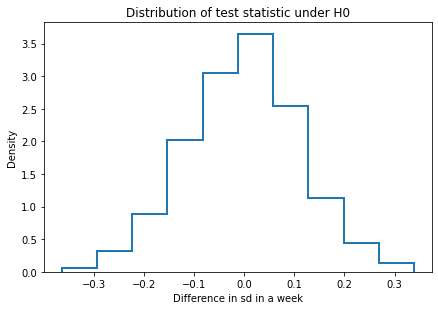

In [ ]:
plot_hist(diffs)

plt.xlabel('Difference in sd in a week')
plt.ylabel('Density')
plt.title('Distribution of test statistic under H0');

In [ ]:
p_value = np.mean(diffs >= diff)
p_value

0.062

The p-value is greater than **0.05**, meaning that we fail to reject the null hypothesis and believe that the standard deviation for predictability of pregnancy length of first baby is different from that of the others.

# Question 5
## AWS ML APIs
In the [lecture notebook](https://github.com/jeremyallenjacobson/qtm350/blob/master/CourseAssets/Rekognition_notebook/AWS-ML-API.ipynb) we walked you through setting up Sagemaker in the Educate account in order to use the AWS ML APIs.

Your task in this question is to select another ML service from AWS and then, using the documentation, create a walkthrough similar to the one we did above for the service you picked.

In your walkthrough, demonstrate how to call the service from within a Sagemaker notebook using either the AWS CLI or the Python SDK (your pick).

As always, be sure to narrate your code with lots of text, images, and links to share. Explain which ML APIs you were interested in, which you tried but couldn't use, and potential use cases that you would like to explore as well as data sources you would like to apply them to.

Finally, because we can't run Sagemaker code in a colab notebook, convert your walkthrough notebook from this exercise into a .html file using `jupyter nbconvert` as the command line. Then, create an S3 bucket, upload the .html file to your bucket, and follow the instructions [here](https://docs.aws.amazon.com/AmazonS3/latest/dev/HowDoIWebsiteConfiguration.html) for making the .html available as a webpage.

 Share the link to it in this notebook, so that I and other students can read your walkthrough.

Click the following link: http://homework3-fontana.s3-website-us-east-1.amazonaws.com/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34182c1e-ced2-433c-9676-54ec654bbd88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>